In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### <font color =red> Checking the null values

In [4]:
df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### <font color = green> There is no null values in Data set

### ================================================================

### <font color =red>Checking the Duplicates

In [5]:
df.duplicated().sum()

3

In [6]:
df.drop_duplicates(inplace=True)

### <font color = green>Droppin The duplicates Values

### ========================================================================

### <font color =red>Checking the Data Types

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### =======================================================================

### <font color = red> Checking the Number of class in target value

In [8]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### =============================================================

### <font color = "red"> Checking the Balance of Data

In [9]:
df.value_counts("species")

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
dtype: int64

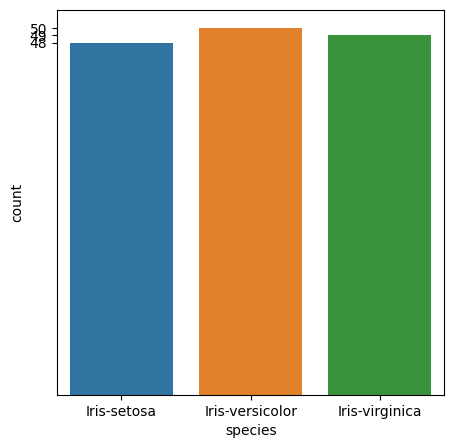

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="species")
c = df["species"].value_counts()
plt.yticks(c)
plt.show()

### <font color = green> The data is wel balance

## ================================================================
    

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### <font color = blue> Applying the label encoder on the output for perdiction

In [12]:
# ! pip install sklearn

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df["species"] = le.fit_transform(df["species"])

In [16]:
df["species"].value_counts()

1    50
2    49
0    48
Name: species, dtype: int64

### ==================================================================================

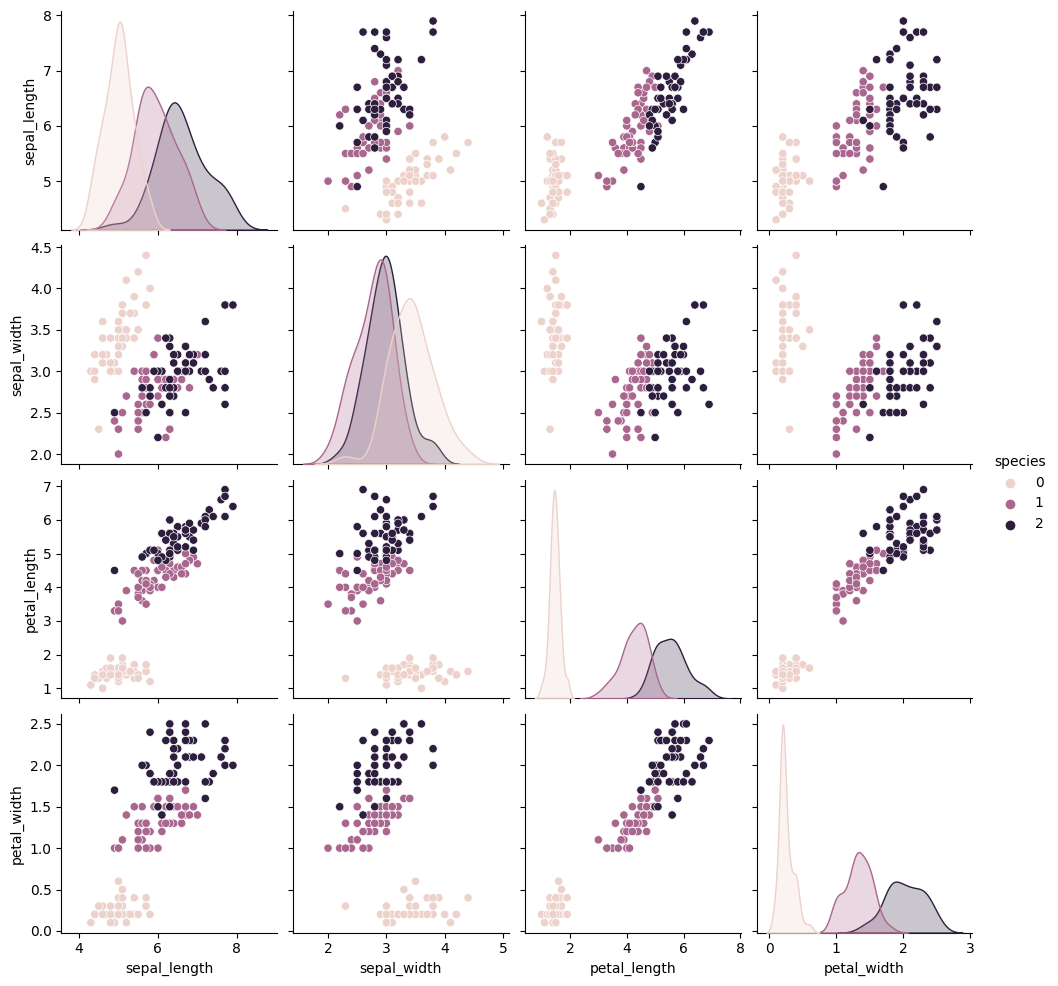

In [17]:
sns.pairplot(data = df,hue="species")
plt.show()

##  <font color = purple> Conclusion :- <font color = green>  Form Pair plot its clear that Clusturing will be more efficient for classification

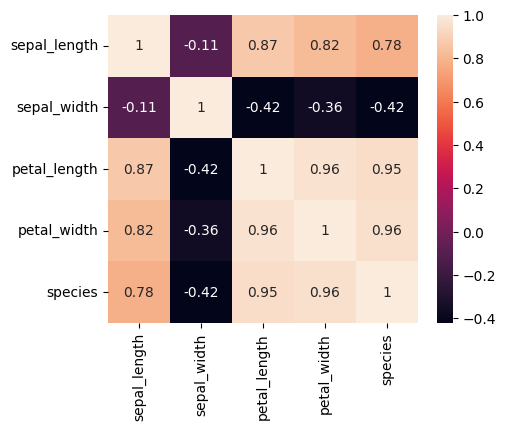

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

## <font color = blue> Cheking the difference between each class according to lengths and witdhts of petal

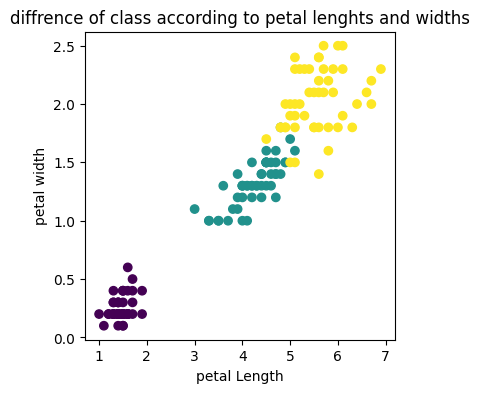

In [19]:
plt.figure(figsize=(4,4))
plt.scatter(df["petal_length"],df["petal_width"],c=df["species"])
plt.xlabel("petal Length")
plt.ylabel("petal width")
plt.title("diffrence of class according to petal lenghts and widths")
plt.show()


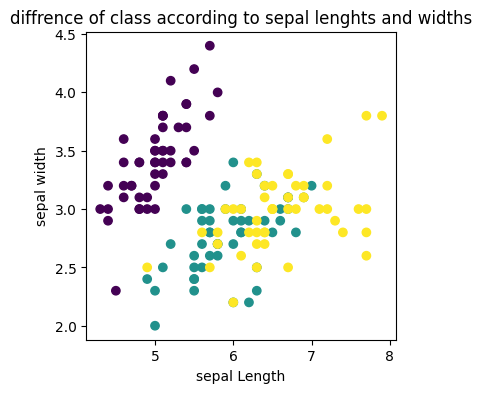

In [20]:
plt.figure(figsize=(4,4))
plt.scatter(df["sepal_length"],df["sepal_width"],c=df["species"])
plt.xlabel("sepal Length")
plt.ylabel("sepal width")
plt.title("diffrence of class according to sepal lenghts and widths")
plt.show()

##  <font color = purple> Conclusion :- <font color = green>  Its Clear that using petal's lenghts and widths we can differetiate between the classes rather than sepal lenghts and widhts

### =============================================================

### <font color = blue> Splitting the Data set into 70-30%

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop("species",axis =1)

In [23]:
Y = df["species"]

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y )

### <font color = purple> It has been observe that without using stratify the testing data bacomes imbalance

### ============================================================================

### <font color = blue> Applying Standard Scaler for Scaling the input values

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
X_train = ss.fit_transform(X_train)

In [28]:
X_test = ss.transform(X_test)

In [29]:
X_train

array([[-0.57403979, -0.17123025,  0.38302012,  0.38254797],
       [ 2.18558592, -1.0904663 ,  1.7321327 ,  1.44431377],
       [-0.21408861, -0.40103926,  0.21438104,  0.11710652],
       [-0.93399097,  0.5181968 , -1.19094456, -0.94465928],
       [ 0.50581375, -0.40103926,  1.00136338,  0.78071014],
       [ 0.14586257, -0.40103926,  0.38302012,  0.38254797],
       [-0.09410488, -0.86065729,  0.72029826,  0.91343087],
       [ 0.2658463 , -1.0904663 ,  1.00136338,  0.24982725],
       [-0.21408861, -0.63084827,  0.15816802,  0.11710652],
       [ 0.14586257,  0.74800581,  0.38302012,  0.5152687 ],
       [-1.41392587,  0.28838778, -1.41579666, -1.34282145],
       [ 1.10573238,  0.28838778,  1.17000245,  1.44431377],
       [ 0.86576493, -0.40103926,  0.43923314,  0.11710652],
       [ 0.62579748, -0.63084827,  1.00136338,  1.17887232],
       [-0.57403979,  1.43743285, -1.30337061, -1.34282145],
       [ 1.22571611,  0.05857877,  0.88893733,  1.17887232],
       [-0.09410488, -0.

### =================================================================================

In [30]:
Y_train.value_counts()

1    35
2    34
0    33
Name: species, dtype: int64

In [31]:
Y_test.value_counts()

2    15
0    15
1    15
Name: species, dtype: int64

### <font color = purple> The Data is ready for model creating

### <font color = blue> Making Function to model trainig and cheking confusion matrix and classification report

In [32]:
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

In [33]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    acc = accuracy_score(Y_test,Y_pred).round(2) *100
    print("Accuracy Score",acc,"%")
    return model

### Training the model with Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


##  <font color = purple> Conclusion :- <font color = green> From confusion matrix is clear that the model is overfitted

### ==================================================================

### Training the model with Decision Tree with gini index , max_depth , min sample leaf

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier(random_state=1,criterion="entropy")

In [39]:
dt = create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [40]:
dt1 = DecisionTreeClassifier(random_state=1,max_depth=5)

In [41]:
result = create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
Accuracy Score 96.0 %


In [42]:
dt2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=200)

In [43]:
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.33      1.00      0.50        15
           2       0.00      0.00      0.00        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

[[ 0 15  0]
 [ 0 15  0]
 [ 0 15  0]]
Accuracy Score 33.0 %


##  <font color = purple> Conclusion :- <font color = green> checking the recall,F1 score and the confusion matrix the model is still underfit

### ================================================================

### Train the model with random Forest Classifier 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy")

In [46]:
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


### ========================================================

### <font color =blue> Training the model with ADA Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
ada = AdaBoostClassifier(n_estimators=50,random_state=1)

In [49]:
ada = create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


### ================================================================

### <font color = blue> trainig the model with Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
 gbc = GradientBoostingClassifier(n_estimators=50,random_state=1)

In [52]:
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


### ========================================================

### <font color = blue> Training the model with Gradient Boost

In [53]:
# ! pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier(n_estimators=50,reg_alpha = 1,random_state=1)

In [56]:
xgb = create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


### =============================================================

### <font color = blue> Training the model with Support Vectore machine

In [57]:
from sklearn.svm import LinearSVC

In [58]:
svc = LinearSVC(random_state=1)

In [59]:
svc = create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [60]:
svc1 = LinearSVC(random_state=1,C=0.99)

In [61]:
svc1 = create_model(svc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


### ==============================================================

### <font color = blue > Trainig the model with SVC Polynominal kernel Function

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(random_state=1,kernel="poly")

In [64]:
svc = create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Accuracy Score 89.0 %


### ==================================================================

### <font color = blue> Training the model with KNeighbors classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knc = KNeighborsClassifier(n_neighbors=5,metric = "minkowski",p=2)

In [67]:
knc = create_model(knc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
Accuracy Score 93.0 %


In [68]:
import pickle

In [69]:
file = open("iris_model.pkl","wb")
file2=open("scale.pkl","wb")
pickle.dump(rfc,file)
pickle.dump(ss,file2)
file.close()
file2.close()

In [70]:
file = open("iris_model.pkl","rb")
file2 = open("scale.pkl","rb")

In [71]:
model = pickle.load(file)
s=pickle.load(file2)

In [72]:
X=[5.1,3.5,1.4,0.2]
X=np.array([X])
X.ndim

2

In [73]:
X=s.transform(X)

In [74]:
Y_pred1=model.predict(X)[0]
if Y_pred1==0:
    r='versicolor'
elif Y_pred1==1:
    r='virginica'
else:
    r='setosa'
print(r)

versicolor
